In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')

In [184]:
df[df['id'] == 17][['long','lat']].to_json(orient="values")

'[[55.9405272281,54.7253993463],[55.9405341617,54.7253994163],[55.9405364404,54.7253989],[55.9405375805,54.7253988448],[55.9405409858,54.7253986799],[55.9405409952,54.7253990826],[55.940544359,54.7253981147],[55.9405477098,54.7253975532],[55.9405477195,54.7253979532],[55.9405499476,54.7253978461],[55.940551058,54.7253977928],[55.9405543748,54.7253976334],[55.9405565638,54.7253971313],[55.9405598342,54.7253965798],[55.940560923,54.7253965284],[55.9405641649,54.7253959813],[55.9405684687,54.7253957796],[55.9405684687,54.7253957796],[55.9405716725,54.7253956294],[55.9405737859,54.7253951403],[55.9405769443,54.7253946048],[55.9405821821,54.7253943633],[55.9405832115,54.7253939297],[55.9405852984,54.7253942197],[55.9405883832,54.7253936933],[55.9405904249,54.7253932167],[55.9405914484,54.7253931703],[55.9405924577,54.7253927421],[55.9405934889,54.7253930779],[55.9405934889,54.7253930779],[55.9405965217,54.7253925596],[55.9405965217,54.7253925596],[55.940598541,54.7253924689],[55.9406015419,

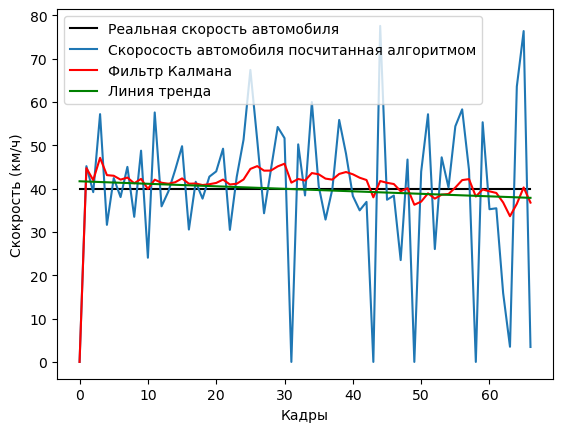

Real speed:  40
Raw mean:  39.80367301767654
Raw std:  17.332371036770944
Kalman mean:  40.65294644612673
Kalman std:  5.57607237227744


In [179]:
speed = np.array(df[df['id'] == 9]['speed'])
x = np.arange(len(speed))
trend = np.poly1d(np.polyfit(x, speed, 1))

# intial parameters---------------
n = len(speed)
sz = (n) # size of array
Q = 1e-4 # process variance
# allocate space for arrays
xhat = np.zeros(sz)      # a posteri estimate of x
P = np.zeros(sz)         # a posteri error estimate
xhatminus = np.zeros(sz) # a priori estimate of x
Pminus = np.zeros(sz)    # a priori error estimate
K = np.zeros(sz)         # Kalman gain
R = 0.1**2 # estimate of measurement variance
xhat[0] = 0.0
P[0] = 1.0

for i in range(1, n):

    xhatminus[i] = xhat[i-1]
    Pminus[i] = P[i-1] + Q

    K[i] = Pminus[i] / ( Pminus[i] + R )
    xhat[i] = xhatminus[i] + K[i] * (speed[i] - xhatminus[i])
    P[i] = (1 - K[i]) * Pminus[i]
#-------------------------------

plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.plot(x, xhat, color='red')
plt.plot(x, trend(x), color='green')

plt.xlabel("Кадры")
plt.ylabel("Скокрость (км/ч)")
plt.legend(["Реальная скорость автомобиля", "Скоросость автомобиля посчитанная алгоритмом", "Фильтр Калмана","Линия тренда"])
plt.show()

print("Real speed: ", 40)
print("Raw mean: ", np.mean(speed))
print("Raw std: ", np.std(speed))
print("Kalman mean: ", np.mean(xhat))
print("Kalman std: ", np.std(xhat))

Считаем коэфциент корреляции между дву величинами

id
0.0     AxesSubplot(0.125,0.11;0.775x0.77)
1.0     AxesSubplot(0.125,0.11;0.775x0.77)
2.0     AxesSubplot(0.125,0.11;0.775x0.77)
3.0     AxesSubplot(0.125,0.11;0.775x0.77)
4.0     AxesSubplot(0.125,0.11;0.775x0.77)
5.0     AxesSubplot(0.125,0.11;0.775x0.77)
6.0     AxesSubplot(0.125,0.11;0.775x0.77)
7.0     AxesSubplot(0.125,0.11;0.775x0.77)
8.0     AxesSubplot(0.125,0.11;0.775x0.77)
9.0     AxesSubplot(0.125,0.11;0.775x0.77)
10.0    AxesSubplot(0.125,0.11;0.775x0.77)
11.0    AxesSubplot(0.125,0.11;0.775x0.77)
12.0    AxesSubplot(0.125,0.11;0.775x0.77)
13.0    AxesSubplot(0.125,0.11;0.775x0.77)
14.0    AxesSubplot(0.125,0.11;0.775x0.77)
15.0    AxesSubplot(0.125,0.11;0.775x0.77)
16.0    AxesSubplot(0.125,0.11;0.775x0.77)
17.0    AxesSubplot(0.125,0.11;0.775x0.77)
18.0    AxesSubplot(0.125,0.11;0.775x0.77)
19.0    AxesSubplot(0.125,0.11;0.775x0.77)
20.0    AxesSubplot(0.125,0.11;0.775x0.77)
21.0    AxesSubplot(0.125,0.11;0.775x0.77)
22.0    AxesSubplot(0.125,0.11;0.775x0.77)
23.0    

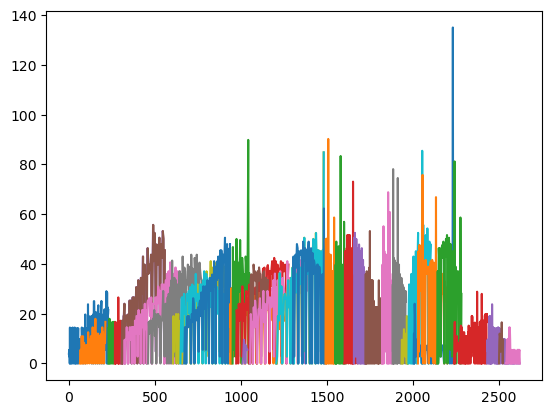

In [2]:
df.groupby(by=['id'])['speed'].plot()